In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv")

df = df.rename(columns = {
    'Gender': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'income',
    'Spending Score (1-100)': 'score'
})

df = df.drop('CustomerID', axis=1)

df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
X = df[['income', 'score']]

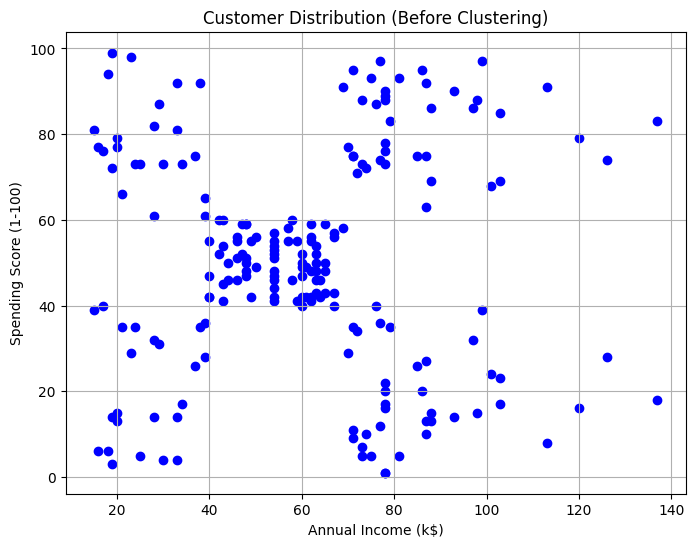

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(X['income'], X['score'], color='blue')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution (Before Clustering)')
plt.grid(True)
plt.show()

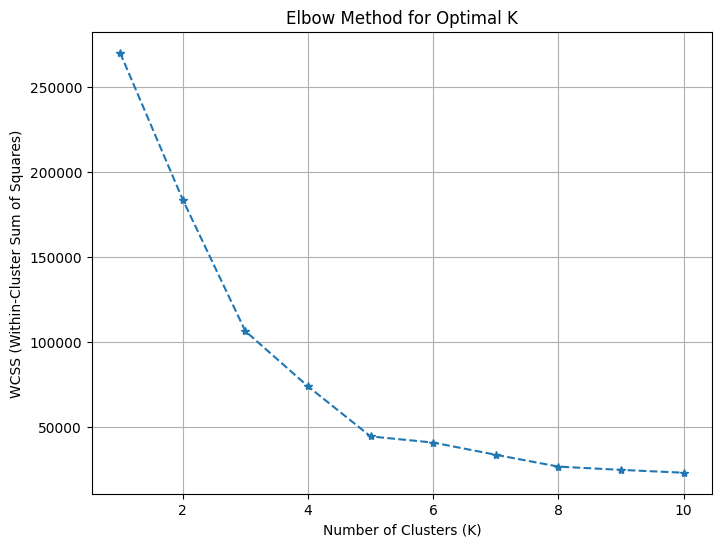

In [8]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='*', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [9]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

In [10]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

df['cluster'] = clusters
df.head()

,gender,age,income,score,cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


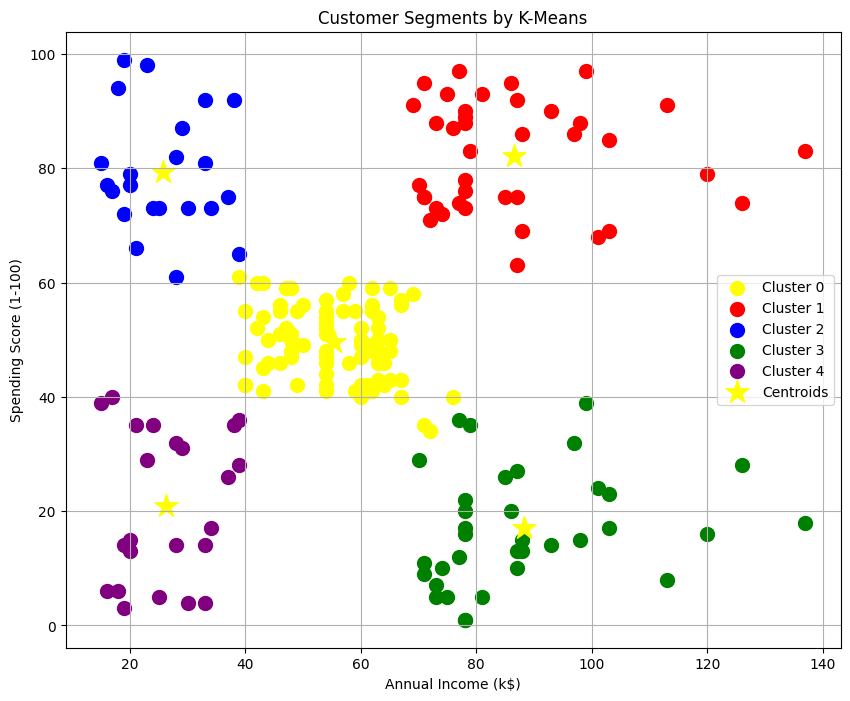

In [11]:
plt.figure(figsize=(10,8))
colors = ['yellow', 'red', 'blue', 'green', 'purple']
for i in range(k):
    plt.scatter(X[clusters == i]['income'], X[clusters == i]['score'],
                s=100, c=colors[i], label=f'Cluster {i}')

# Centroid দেখানো
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='*', label='Centroids')

plt.title('Customer Segments by K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

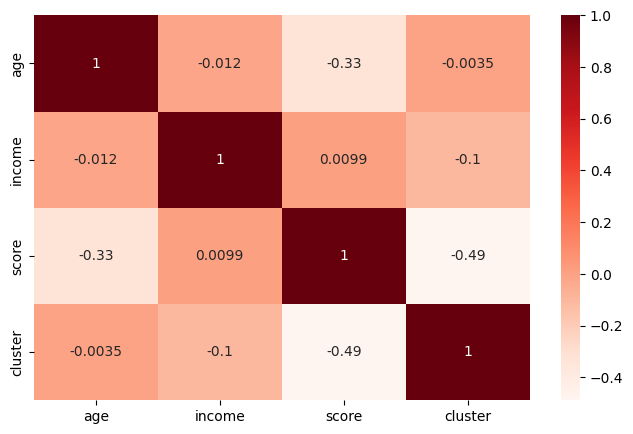

In [12]:
fig,ax = plt.subplots(figsize=(8,5))
sns.heatmap(df.drop('gender', axis=1).corr(),annot=True,cmap="Reds" ,ax=ax)
plt.show()

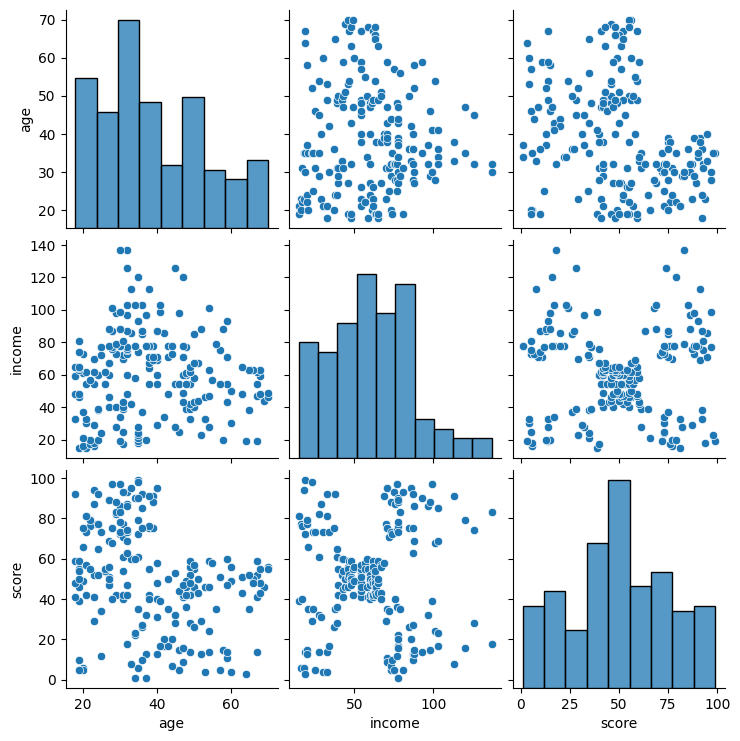

In [13]:
# Pairplot

sns.pairplot(df, vars=['age', 'income', 'score'])
plt.show()

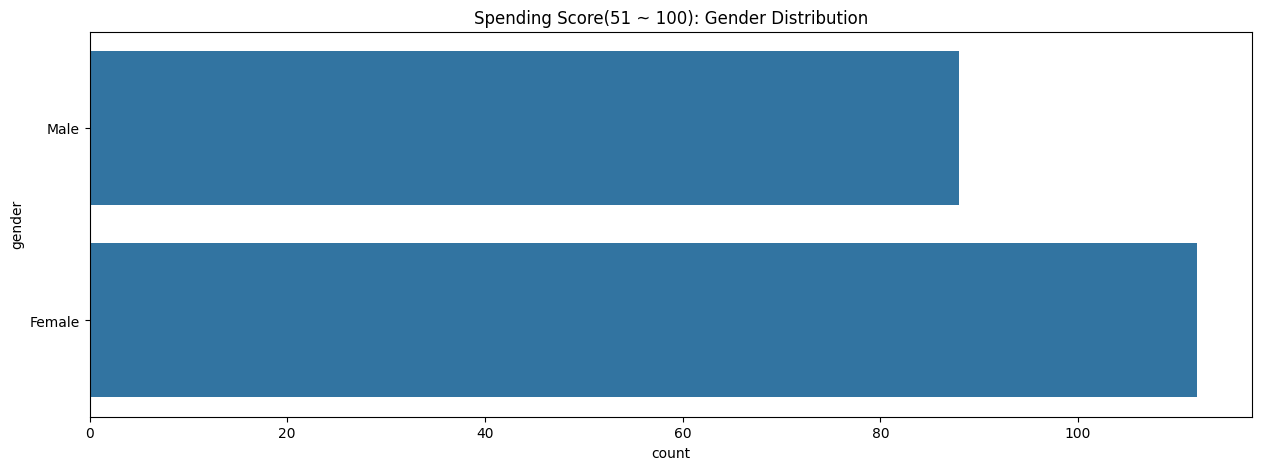

In [14]:
# Gender-wise Count

plt.figure(figsize = (15 , 5))
sns.countplot(y = 'gender' , data = df)
plt.title('Spending Score(51 ~ 100): Gender Distribution')
plt.show()

In [15]:
# Block 11: Silhouette Score Analysis

import plotly.express as px
from sklearn.metrics import silhouette_score

silhouette_scores = []
n_clusters = range(2, 11)

for i in n_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

fig = px.line(x= list(n_clusters), y=silhouette_scores, title="K-Means: Silhouette Score vs Number of Clusters")
fig.update_layout(xaxis_title='Number of Clusters', yaxis_title='Silhouette Score')
fig.show()

In [16]:
# Block 12: Final Cluster Summary Bar Chart

final_model = KMeans(n_clusters=5 , random_state= 42)
final_model.fit(X)

labels = final_model.labels_
centroids = final_model.cluster_centers_

xgb = X.groupby(final_model.labels_).mean()
fig = px.bar(
    xgb,
    barmode='group',
    title="Annual income and spending score by Cluster"
)
fig.update_layout(xaxis_title="Clusters", yaxis_title='Value')
fig.show()